In [20]:
import os
import numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [39]:
# Load data from excel workbooks from lululemon
data_path = '/Users/amanda/Documents/Projects/insight/data/raw/lulu-temp-data/'

df_screen = pd.read_excel(os.path.join(data_path,'Lulu4 Screening Data Master.xlsx'))
df_biodata = pd.read_excel(os.path.join(data_path,'Lulu4 Biopac Data.xlsx'), header=1)
df_perceptions = pd.read_excel(os.path.join(data_path,'Lulu4 Data Sheet Perceptions.xlsx'), header=1)

In [62]:
# Clean data
df_biodata['Protocol Point'] = df_biodata['Protocol Point'].str.strip()
df_biodata['Protocol Point'] = df_biodata['Protocol Point'].replace('Humidty', 'Humidity')

df_perceptions['Protocol Point'] = df_perceptions['Protocol Point'].str.strip()
df_perceptions['Protocol Point'] = df_perceptions['Protocol Point'].replace('Rest', 'Baseline')


In [81]:
# Add gender and other contextual information from screening table to biodata dataFrame
df_merged = pd.merge(left=df_biodata, right=df_screen, left_on='Subject #', right_on='Subject #')

# Merge biodata dataFrame with subjective assessments of temperature
df = pd.merge(left=df_merged, right=df_perceptions, how='left', left_on=['Subject #','Condition','Protocol Point','Time'], right_on=['Subject #','Conditon','Protocol Point','Time'])
df.columns

Index(['Subject #', 'Condition', 'Protocol Point', 'Time', 'Tcore',
       'Neck Device Temperature', 'Arm Temp', 'Trunk Temp', 'Head Temp',
       'Leg Temp', 'Axilla Hum (SR1)', 'Ambient Hum (SR2)',
       'Forearm SkBF (LDF 1)', 'Fingertip SkBF (LDF 2)', 'GSC (uOhms)',
       'Neck Temperature', 'Unnamed: 16', 'Avg Tsk', 'Forearm SR', 'Gender',
       'Age', 'Height (cm)', 'Weight (kg)', 'HR (bpm)', 'SBP', 'DBP',
       '% Body Fat', 'IPAQ Score', 'IPAQ Category', 'MoCA Score', 'BSA (m2)',
       'Birth Control', 'Conditon', 'Face', 'Neck', 'Chest', 'Back', 'Arms',
       'Legs', 'Whole Body', 'Face.1', 'Neck.1', 'Chest.1', 'Back.1', 'Arms.1',
       'Legs.1', 'Whole Body.1', 'Face.2', 'Neck.2', 'Chest.2', 'Back.2',
       'Arms.2', 'Legs.2', 'Whole Body.2', 'Face.3', 'Neck.3', 'Chest.3',
       'Back.3', 'Arms.3', 'Legs.3', 'Whole Body.3', 'Face.4', 'Neck.4',
       'Chest.4', 'Back.4', 'Arms.4', 'Legs.4', 'Whole Body.4', 'Affect'],
      dtype='object')

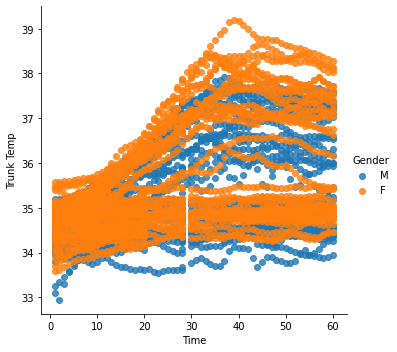

In [83]:
sns.lmplot(x='Time',y='Trunk Temp',data=df,           
           fit_reg=False, # No regression line
           hue='Gender')   # Color by evolution stage

In [ ]:


g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);